<a href="https://colab.research.google.com/github/FaithKare/KNN-and-Naive-bayes-Classification-/blob/master/Faith_Wangari_week9_IP_Naive_bayes_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

## a) Specyfing the question for analysis


Create models with the naive bayes classifier using different train test split sizes to predict if an email is spam or not. Thereafter optimize the best performing model.

## b) Defining metric of success


Identyfing the accuracy score of the models and thereafter getting the overall best accuracy by optimizing the best performed model.

## c) Understanding the context

Everyone gets bothered by spam e-mails landing in their inboxes all the time. These unsolicited messages have been a constant part of our e-mail correspondence since the mid-nineties. But what actually is spam and why is it sent? Most importantly, how can you get rid of undesired spam e-mails or prevent them entirely?

## d) Recording the experimental design


Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:

*   Data Loading 

*   Data Cleaning

*   Exploratory Data Analysis 

*   Feature Engineering

*   Implementing the solution with the K-NN algorithm 
> First model (80-20) sets , 
> Second model (70-30) sets , 
> Third mode (60-40) sets , 

*   Optimizing the best model 

# 2. Loading and checking the data


In [ ]:
# importing relevant libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
names = ['word_freq_make',	'word_freq_address','word_freq_all,word_freq_3d',	'word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order',
         'word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses', 'word_freq_free',	'word_freq_business', 'word_freq_email',
         'word_freq_you', 'word_freq_credit','word_freq_your', 'word_freq_font', 'word_freq_000'	,'word_freq_money',	'word_freq_hp','word_freq_hpl','word_freq_george', 'word_freq_650',
         'word_freq_lab' ,'word_freq_labs' ,'word_freq_telnet' ,'word_freq_857' ,'word_freq_data' ,'word_freq_415' ,'word_freq_85' ,'word_freq_technology' ,'word_freq_1999' ,'word_freq_parts',
         'word_freq_pm','word_freq_direct',	'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project' ,'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam']

In [ ]:
df = pd.read_csv("spambase.csv", names = names )

In [ ]:
# preview of the train dataset which we wil focus on since it has the label data 
df.head()

,word_freq_make,word_freq_address,"word_freq_all,word_freq_3d",word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# preview of the bottom of the dataset 
df.tail()

,word_freq_make,word_freq_address,"word_freq_all,word_freq_3d",word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# checking the number of records in the dataset
df.shape

(4601, 57)

In [ ]:
# checking if each column has the right dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4601 entries, 0.0 to 0.0
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all,word_freq_3d  4601 non-null   float64
 3   word_freq_our               4601 non-null   float64
 4   word_freq_over              4601 non-null   float64
 5   word_freq_remove            4601 non-null   float64
 6   word_freq_internet          4601 non-null   float64
 7   word_freq_order             4601 non-null   float64
 8   word_freq_mail              4601 non-null   float64
 9   word_freq_receive           4601 non-null   float64
 10  word_freq_will              4601 non-null   float64
 11  word_freq_people            4601 non-null   float64
 12  word_freq_report            4601 non-null   float64
 13  word_freq_addresses         46

# 3. Data Cleaning

In [ ]:
# checking for missing values 
df.isnull().sum()

# there are no missing values in the dataset

word_freq_make                0
word_freq_address             0
word_freq_all,word_freq_3d    0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_freq_857                 0
word_fre

In [ ]:
# checking for duplicates in the data 
df.duplicated().sum()

391

In [ ]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints
df.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
df.duplicated().any()

False

In [ ]:
# checking for anomalies in the dataset 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3- Q1
IQR

word_freq_make                  0.00000
word_freq_address               0.44000
word_freq_all,word_freq_3d      0.00000
word_freq_our                   0.41000
word_freq_over                  0.00000
word_freq_remove                0.00000
word_freq_internet              0.00000
word_freq_order                 0.00000
word_freq_mail                  0.19000
word_freq_receive               0.00000
word_freq_will                  0.83000
word_freq_people                0.00000
word_freq_report                0.00000
word_freq_addresses             0.00000
word_freq_free                  0.12750
word_freq_business              0.00000
word_freq_email                 0.00000
word_freq_you                   2.72000
word_freq_credit                0.00000
word_freq_your                  1.28000
word_freq_font                  0.00000
word_freq_000                   0.00000
word_freq_money                 0.00000
word_freq_hp                    0.09750
word_freq_hpl                   0.00000


# 4. Exploratory Data Analysis 

In [ ]:
# precise univariate summary of the dataset
#
df.describe()

,word_freq_make,word_freq_address,"word_freq_all,word_freq_3d",word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


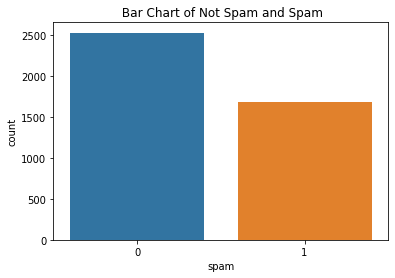

In [ ]:
## Countplot for the target variable Not Spam and Spam
sns.countplot(df["spam"])
plt.title(" Bar Chart of Not Spam and Spam")
plt.show()

# the dataset has more spam emails than not spam 

# Feature Engineering

In [ ]:
# Create correlation matrix to determine the correlation among the features 
corr_matrix = df.corr().abs()
corr_matrix


,word_freq_make,word_freq_address,"word_freq_all,word_freq_3d",word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.027789,0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,0.006735,0.117797,0.001214,0.007064,0.061282,0.053573,0.044627,0.011228,0.033000,0.026048,0.029419,0.015937,0.028852,0.032575,0.026039,0.025524,0.028262,0.003749,0.012708,0.016208,0.002326,0.019350,0.035908,0.037681,0.029055,0.020029,0.026004,0.012337,0.020947,0.014735,0.028348,0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_address,0.027789,1.000000,0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,0.039464,0.106694,0.031150,0.092684,0.066464,0.081297,0.051471,0.057847,0.030519,0.036610,0.063579,0.058002,0.063417,0.048968,0.047593,0.074329,0.031756,0.017418,0.046013,0.030822,0.007620,0.052736,0.056883,0.056600,0.060558,0.027384,0.029465,0.036778,0.024545,0.035805,0.097316,0.072944,0.004520,0.095671,0.092513,0.051961,0.172350
"word_freq_all,word_freq_3d",0.008947,0.019901,1.000000,0.000256,0.009163,0.014289,0.003801,0.001040,0.003845,0.013191,0.018577,0.013153,0.003379,0.005375,0.005798,0.002827,0.016561,0.009933,0.005006,0.004577,0.030589,0.014715,0.025851,0.015702,0.014030,0.009710,0.010630,0.007931,0.010911,0.007654,0.006967,0.008246,0.006975,0.005907,0.006309,0.007436,0.002723,0.004506,0.007654,0.006075,0.008318,0.009384,0.006114,0.013178,0.009432,0.003409,0.001861,0.000028,0.011443,0.007514,0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,0.022715,0.062136,0.000321,0.076783,0.079807,0.062482,0.064151,0.039627,0.053613,0.042054,0.024256,0.034749,0.024555,0.051058,0.052210,0.077682,0.133057,0.045512,0.017580,0.052325,0.107706,0.054583,0.002771,0.049497,0.083315,0.028146,0.035040,0.035049,0.054580,0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,0.010498,0.230074
word_freq_over,0.005526,0.066547,0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,0.086682,0.089520,0.050811,0.067771,0.048898,0.048262,0.046347,0.036525,0.035031,0.037089,0.055394,0.054298,0.060609,0.018420,0.049223,0.027722,0.030898,0.056541,0.037610,0.030174,0.057469,0.034364,0.014740,0.033478,0.021744,0.011584,0.016729,0.058121,0.105927,0.020413,0.013554,0.065709,0.063403,0.212311
word_freq_remove,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,0.186794,0.008437,0.003165,0.023818,0.037437,0.135875,0.189654,0.115447,0.102589,0.049675,0.143770,0.002935,0.068443,0.034547,0.094994,0.084666,0.060458,0.070265,0.050260,0.061300,0.047897,0.042702,0.043017,0.043140,0.055209,0.057351,0.055920,0.015446,0.049424,0.019709,0.035875,0.052009,0.053141,0.036292,0.057273,0.059125,0.0181

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)

['word_freq_415', 'word_freq_direct']


In [ ]:
# Drop marked features that is the highly correlated features 
df.drop(df[to_drop], axis=1)

,word_freq_make,word_freq_address,"word_freq_all,word_freq_3d",word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Implementing the Solution with Naive Bayes Classifier 

## a) Gaussian First Model (80-20) sets

The gaussian naive bayes classifier was used since all the features in the dataset are continous.

In [ ]:
# Splitting to features and labels 
X = df.drop(['spam'],axis =1 )
y = df['spam']

# splitting the data into train and test and settin the test size to 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

#feature scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
# Fitting the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()  
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the score 
y_pred1 = classifier.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.8206650831353919

In [ ]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


[[357 138]
 [ 13 334]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



This model achieved a recall percentage for 72% for not spam emails and 96% for spam emails. 

## b) Gaussian 2nd Model (70-30) sets 

In [ ]:
# Splitting to features and labels 
X = df.drop(['spam'],axis =1 )
y = df['spam']

# splitting the data into train and test and settin the test size to 70%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)


In [ ]:
# Fitting the model
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()  
classifier2.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the score 
y_pred2 = classifier2.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.833729216152019

In [ ]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[541 196]
 [ 14 512]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



Increasing the test size to 30% of the data the recall perecntage of not spam emails increases slightly to 73% as well as the recall percentage of spam emails increases to 97%

## c) Gaussian 3rd Model (60-40) sets

In [ ]:
# Splitting to features and labels 
X = df.drop(['spam'],axis =1 )
y = df['spam']

# splitting the data into train and test and settin the test size to 70%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=0)

In [ ]:
# Fitting the model
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()  
classifier3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the score 
y_pred3 = classifier3.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.8319477434679335

In [ ]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[735 259]
 [ 24 666]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       994
           1       0.72      0.97      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.87      0.83      0.83      1684



The third model performed the best with a recall percentage of 74% and 97% of the spam and not spam emails compared to the other algorithms. 

# Optimizing the Best Model

Here we will perform data reduction using LDA on the features to get  a better performing model with better precision , recall and accuracy.

In [ ]:
#Data Reduction
#features and label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#split data with 60/40 since it was the best performed model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


#create and fit model
clf = GaussianNB().fit(X_train, y_train)
y_pred4 = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
accuracy_score(y_test, y_pred4)

0.8978622327790974

In [ ]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[935  59]
 [113 577]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       994
           1       0.91      0.84      0.87       690

    accuracy                           0.90      1684
   macro avg       0.90      0.89      0.89      1684
weighted avg       0.90      0.90      0.90      1684



The percentage of results which are relevant (precision) and the percentage of total relevantresults correctly classified ( recall) by the algorithm increased significantly when the features were reduced using LDA. 

The model was correctly optimized by reduction.

In [ ]:
#show eigen values for the columns
lda.coef_

array([[-1.30678400e-01,  4.27654811e-02,  9.24649675e-02,
         8.24725347e-01,  9.64822661e-01,  2.01856808e+00,
         6.30954265e-01,  4.51676487e-01,  5.78224440e-02,
         1.25892301e+00, -2.63090397e-01, -1.18977553e-01,
         7.56939072e-03,  1.08195259e-01,  7.69748299e-01,
         4.81764421e-01,  4.94473878e-01,  1.61820282e-01,
         5.40162057e-01,  5.61952842e-01,  4.54787214e-01,
         1.69493305e+00,  1.00098499e+00, -2.48173823e-01,
        -9.92848728e-02, -1.86992095e-01, -3.45921783e-01,
         7.11438273e-02, -5.42703132e-01, -3.30679618e-01,
         2.81425079e+00, -3.77455861e-01, -2.52763021e+00,
        -2.16149929e-01,  6.54097829e-01, -5.88430358e-01,
        -3.95944993e-01, -2.02186965e-01,  4.56257844e-01,
        -1.33724028e-01, -4.31319269e-01, -4.07509169e-01,
        -2.74804861e-01, -3.07677411e-01, -2.97614594e-01,
        -9.91689104e-01, -3.98556572e-01, -1.38397980e+00,
        -1.05704312e-01, -3.47160983e-01,  1.03772867e+0

# Follow Up Questions 

a) Did we have the right data ?

Yes the data was appropriate for this analysis

b) Did we have the rigt question ?

Yes

c) Do we need another data to answer the question ? 

No the data was sufficient.